# Phase 2: Find Processing Techniques
## Iteration 3: Find Best Preprocessing Techniques 
### Import Libraries and Scripts

In [6]:
%reload_ext autoreload
%autoreload 2

In [1]:
# import functions and classes for model
from Utils.preporcessing_utils import data_loading 
from Utils.preporcessing_utils import labels_encoding
from Utils.preporcessing_utils import split_data
from Utils.preporcessing_utils import ablation
from Utils.run_model_utils import run_model

2025-09-16 07:12:42.295888: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-16 07:12:43.355004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758021163.634203  104585 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758021163.764989  104585 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-16 07:12:44.864057: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [1]:
# import functions and classes for visualization
from Utils.visualizations_utils import Visualization

### Data Preparation and Basic Preprocessing

In [3]:
# Loads data
train_df, test_df = data_loading("train_full.csv", "test_full.csv")

In [4]:
# Create dataframe and transform(encodes) pathology labels
train_df, test_df = labels_encoding(train_df, test_df)

In [5]:
train_df.columns

Index(['image_id', 'image_type', 'image_path', 'series_uid', 'subject_id',
       'study_uid', 'breast_density', 'breast_side', 'image_view',
       'abnormality_type', 'pathology', 'split', 'label'],
      dtype='object')

In [6]:
# Split data
train_data, val_data, test_data = split_data(train_df, test_df, 0.11)

Train set: 1889 cases, 70.35 %
Validation set: 234 cases, 8.72 %
Test set: 562 cases, 20.93 %


### Baseline No Preprocessing Techniques Only Resizing

In [7]:
baseline_techniques = {
    "Baseline Basic Preporcessing":{
         'apply_background_removal': False,
         'apply_crop': False,
         'apply_noise_reduction': False,
         'apply_contrast_enhancement': False,
         'apply_edge_enhancement': False,
         'apply_lbp_texturizer': False
    }
}

### Models Architecture Settings

In [8]:
architecture_settings_iter4 = {
    "(DenseU=256, Dropout=0.2, layer=256)": {"epochs":10, "layers": [32, 64, 128, 256], "activation": 'relu', "dense_units":[256], "dropout": 0.2}
}

In [9]:
import pandas as pd
arch = pd.DataFrame(architecture_settings_iter4)
arch.transpose()

,epochs,layers,activation,dense_units,dropout
"(DenseU=256, Dropout=0.2, layer=256)",10,"[32, 64, 128, 256]",relu,[256],0.2


### Compare Models Performance: Custom CNN 

#### Training
This models uses the custom CNN with the tf.Dataset image iterator, no preporcessing techniques, 10 epochs and  <br>
the following model settings:
- Dropout=0.2
- Dense units of 256
- Adding a new layer of 256 

In [10]:
# runs baseline model with an image dataset generator 
run_model((train_data, val_data, test_data), 
              baseline_techniques, 
              project_phase="P3",
              iteration=4,
              with_preprocess=False, 
              model_type="dynamic",
              models_settings=architecture_settings_iter4)

I0000 00:00:1758021320.311012  104585 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Training Dynamic10 - Baseline Basic Preporcessing - (DenseU=256, Dropout=0.2, layer=256)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,167,489 (65.49 MB)

 Trainable params: 17,166,529 (65.49 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/10


I0000 00:00:1758021323.454035  104740 service.cc:148] XLA service 0x746564001ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758021323.456216  104740 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-09-16 07:15:23.602753: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1758021323.836476  104740 cuda_dnn.cc:529] Loaded cuDNN version 90501


 1/60 ━━━━━━━━━━━━━━━━━━━━ 7:42 8s/step - accuracy: 0.5000 - loss: 1.1515

I0000 00:00:1758021329.716467  104740 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 112ms/step - accuracy: 0.4869 - loss: 2.1942 - val_accuracy: 0.5000 - val_loss: 0.6919
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.5378 - loss: 0.6924 - val_accuracy: 0.5684 - val_loss: 0.6865
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6002 - loss: 0.6509 - val_accuracy: 0.5598 - val_loss: 0.6704
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6330 - loss: 0.6265 - val_accuracy: 0.5684 - val_loss: 0.6616
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6374 - loss: 0.6133 - val_accuracy: 0.5983 - val_loss: 0.6511
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6817 - loss: 0.5927 - val_accuracy: 0.6111 - val_loss: 0.6516
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.7100 - loss: 0.5543 - val_accuracy: 0.5897 - val_loss: 0.6579
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.7355 - loss: 0.5252 - val_accuracy: 0.5855 - val_loss: 

### Compare Models Performance: VGG16 

#### Training
This models uses the VGG16 with Transfer Learning with the tf.Dataset image iterator, no preporcessing techniques, 10 epochs and  <br>
the following model settings:
- Dropout=0.2
- Dense units of 256
- Adding a new layer of 256 

In [12]:
# runs baseline model with an image dataset generator 
run_model((train_data, val_data, test_data), 
              baseline_techniques, 
              project_phase="P3",
              iteration=4,
              with_preprocess=False, 
              model_type="VGG16",
              is_resnet_vgg=True,
              models_settings=architecture_settings_iter4)

Training Vgg16:10 - Baseline Basic Preporcessing - (DenseU=256, Dropout=0.2, layer=256)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 153ms/step - accuracy: 0.5603 - loss: 2.7342 - val_accuracy: 0.6239 - val_loss: 0.8800
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.6867 - loss: 0.7956 - val_accuracy: 0.6111 - val_loss: 0.7092
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.8561 - loss: 0.3166 - val_accuracy: 0.6838 - val_loss: 0.7238
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9341 - loss: 0.1896 - val_accuracy: 0.6368 - val_loss: 0.7671
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.9608 - loss: 0.1278 - val_accuracy: 0.6068 - val_loss: 0.9413
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.9676 - loss: 0.1054 - val_accuracy: 0.6282 - val_loss: 1.1275
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9815 - loss: 0.0711 - val_accuracy: 0.6453 - val_loss: 1.0328
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.9782 - loss: 0.0716 - val_accuracy: 0.6538 -

### Compare Models Performance: ResNet50

#### Training
This models uses the ResNet50 Transfer Learning with the tf.Dataset image iterator, no preporcessing techniques, 10 epochs and  <br>
the following model settings:
- Dropout=0.2
- Dense units of 256
- Adding a new layer of 256 

In [13]:
# runs baseline model with an image dataset generator 
run_model((train_data, val_data, test_data), 
              baseline_techniques, 
              project_phase="P3",
              iteration=4,
              with_preprocess=False, 
              model_type="ResNet50",
              is_resnet_vgg=True,
              models_settings=architecture_settings_iter4)

Training Resnet50:10 - Baseline Basic Preporcessing - (DenseU=256, Dropout=0.2, layer=256)
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10


2025-09-16 07:24:29.502563: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9121', 24 bytes spill stores, 24 bytes spill loads

2025-09-16 07:24:29.528408: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5966_0', 112 bytes spill stores, 224 bytes spill loads

2025-09-16 07:24:29.586370: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9121', 24 bytes spill stores, 28 bytes spill loads

2025-09-16 07:24:29.590943: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9121', 24 bytes spill stores, 28 bytes spill loads

2025-09-16 07:24:29.621404: I external/local_xla/xla/str

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5221 - loss: 0.7375

2025-09-16 07:24:40.229015: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1691_0', 8 bytes spill stores, 8 bytes spill loads



60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 155ms/step - accuracy: 0.5221 - loss: 0.7375 - val_accuracy: 0.5427 - val_loss: 0.7098
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5425 - loss: 0.7099 - val_accuracy: 0.5769 - val_loss: 0.6935
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.5726 - loss: 0.6759 - val_accuracy: 0.5726 - val_loss: 0.6884
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6154 - loss: 0.6420 - val_accuracy: 0.5855 - val_loss: 0.6810
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.6423 - loss: 0.6203 - val_accuracy: 0.5556 - val_loss: 0.6811
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6731 - loss: 0.6052 - val_accuracy: 0.5812 - val_loss: 0.6762
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6815 - loss: 0.5892 - val_accuracy: 0.5812 - val_loss: 0.6728
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6837 - loss: 0.5746 - val_accuracy: 0.5897 - val_loss: 

2025-09-16 07:25:18.078633: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1681_0', 8 bytes spill stores, 8 bytes spill loads

2025-09-16 07:25:18.102550: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1681', 16 bytes spill stores, 16 bytes spill loads

2025-09-16 07:25:18.225204: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1681', 8 bytes spill stores, 8 bytes spill loads



18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step
[INFO]Models data is saved to Outputs/Iteration4/resnet50:10_-_baseline_basic_preporcessing_-_(denseu=256,_dropout=0.2,_layer=256).json 




### Visulaizing Models for Comparison
The following are some visualizations to compare the model outputs for each type of model: Custom CNN, VGG16 and ResNet50

In [11]:
# gets data based from models using tf.Data.Dataset
out_dir = "Outputs/Iteration4"

# initialize visualization instance
vis = Visualization(out_directory=out_dir, str_filter="baseline_basic_preporcessing", identifier=0)

# loads data 
models_data = vis.load_files()

# gets names of models
display_models_names = models_data.keys()

# classes
classes = ['Benigant', 'Malignant']

In [12]:
for k in models_data.keys():
    print(k)

Dynamic10 - Baseline Basic Preporcessing - (DenseU=256, Dropout=0.2, layer=256)
Resnet50:10 - Baseline Basic Preporcessing - (DenseU=256, Dropout=0.2, layer=256)
Vgg16:10 - Baseline Basic Preporcessing - (DenseU=256, Dropout=0.2, layer=256)


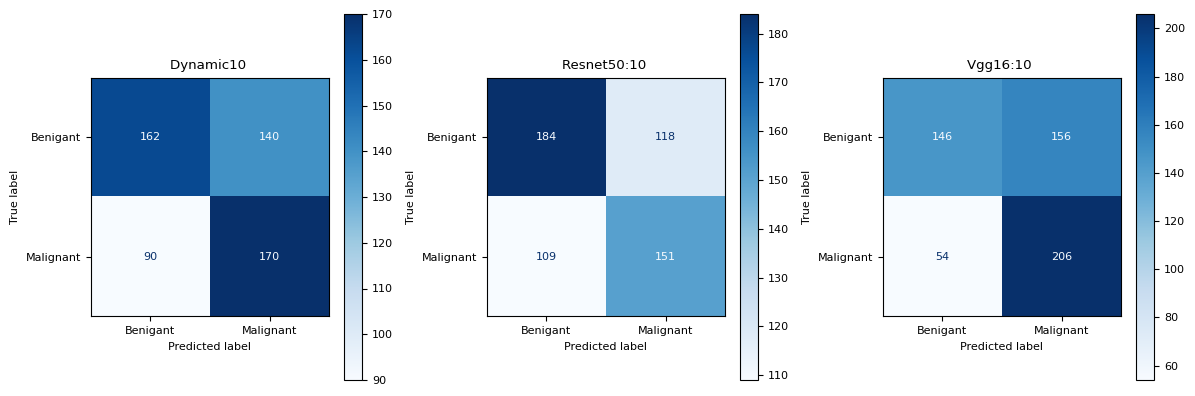

In [13]:
# vusualize confusion matrix
vis.confusion_matrices(models_data, models_data.keys(), classes=classes)

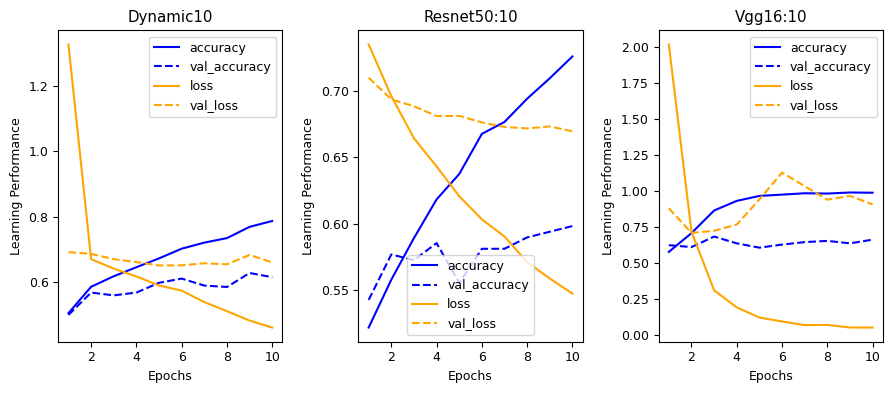

In [14]:
# visualize line plots 
vis.learning_curves(models_data, display_models_names, ["accuracy", "loss"], ["blue", "orange"])

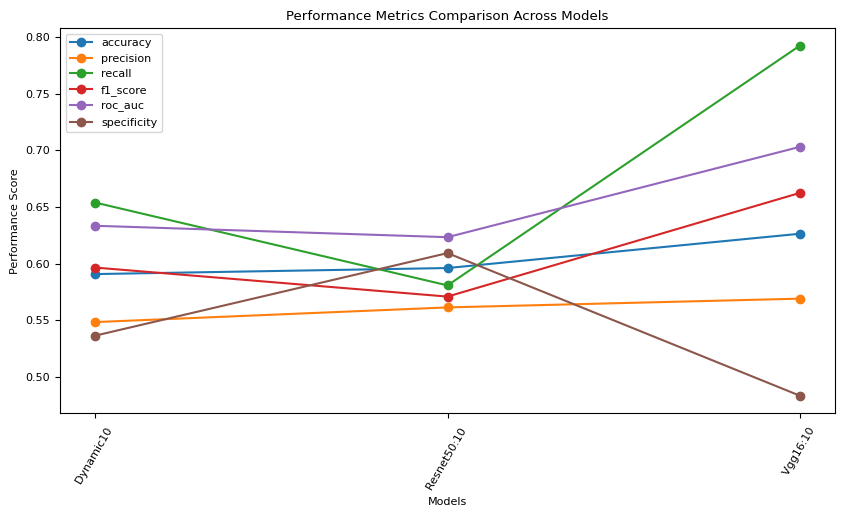

In [15]:
vis.line_plot(models_data, display_models_names, ["accuracy", "precision", "recall", "f1_score", "roc_auc", "specificity"])

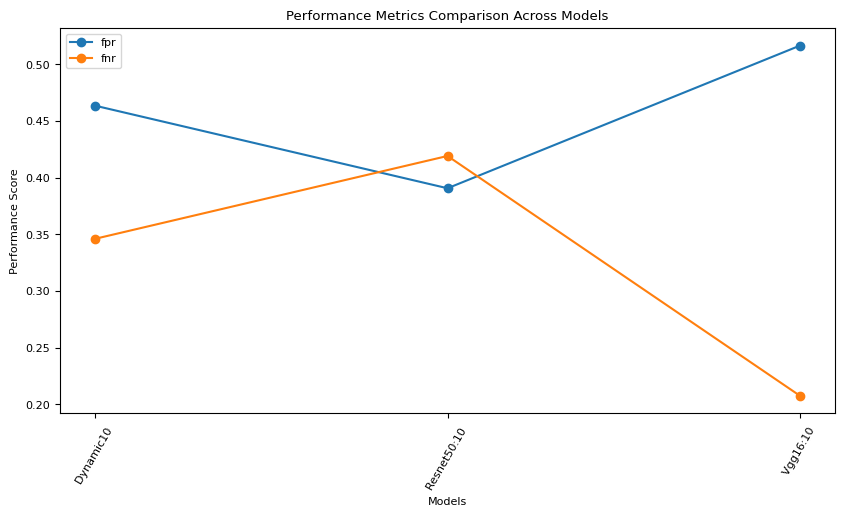

In [16]:
vis.line_plot(models_data, display_models_names, ["fpr", "fnr"])

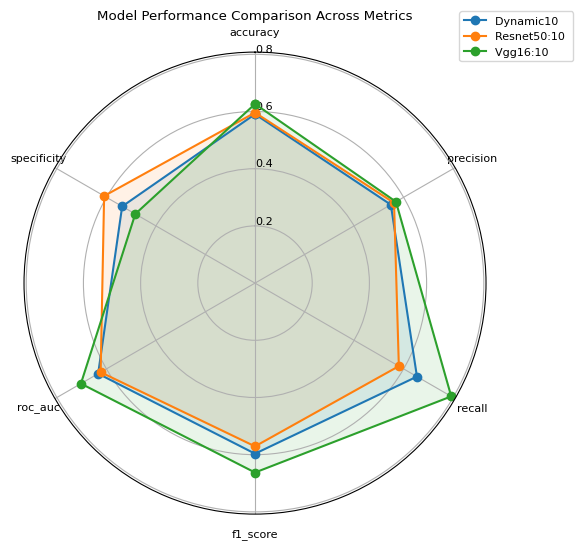

In [17]:
vis.radar_chart(models_data, display_models_names, ["accuracy", "precision", "recall", "f1_score", "roc_auc", "specificity"])

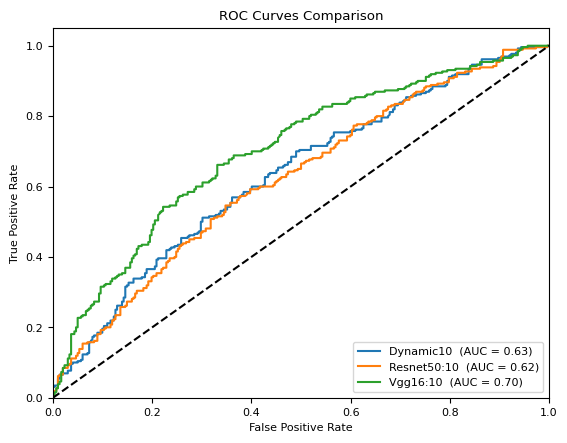

In [18]:
vis.ROC_curve(models_data, display_models_names)